# Matplotlib

Matplotlib - продвинутая библиотека для создания визуализации в Python. Оффициальный сайт библиотеки содержит <a href='https://matplotlib.org/tutorials/index.html'>огромное количество хорошо описанных примеров использования</a>. Сама библиотека является полностью объектно-ориентированной, и для полноценной работы с ней нужно более продвинутое знание Python чем предпологает данный курс.


Как и NumPy, matplotlib не входит в стандартный набор библиотек Python, и требует отдельной установки в случае отсутствия в дистрибутиве (в Anaconda данная библиотека установленна по умолчанию).

Для простой работы с библиотекой, авторами реализован модуль с коллекцией функций matplotlib.pyplot, который позволяет реализовать большую часть базовых потребностей по визуализации данных. 


Расмотриим простейший пример использования:

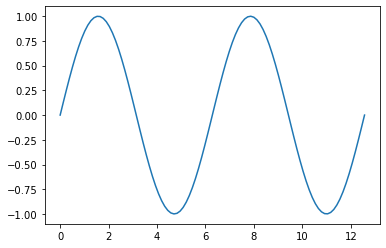

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#готовим данные
X = np.linspace(0, 4*np.pi, 100)
Y = np.sin(X)

plt.plot(X, Y)   # добавляем график
plt.show()       # строим график

Для построения нескольких кривых на одном графике достаточно несколько раз вызвать функию plot:

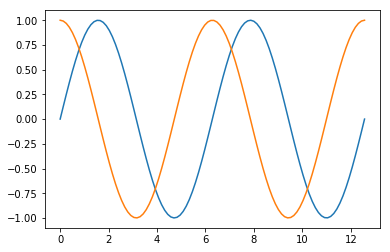

In [7]:
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))
plt.show()

# Свойства линии и точки

В matplotlib есть продвинутый способ задавать базовые свойства линии и точки. Для простого же применения достаточно передать в функцию plot() аргумент в виде строки с ключевыми символами 'цвет маркер линия'. Полную таблицу символов и стилей можно найти в <a href='https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot'>разделе Notes описания функции plot</a>. 

По умолчанию визуализация происходит линиями.

Рассмотрим несколько примеров:

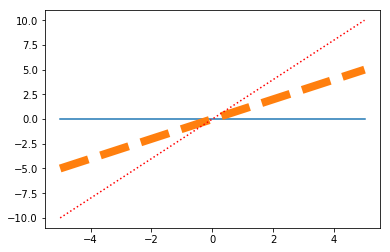

In [19]:
X = np.linspace(-5, 5, 10)

plt.plot(X,0*X, '-')   # линия
plt.plot(X,1*X, '--', linewidth=8)  # пунктир потолще
plt.plot(X,2*X, 'r:')  #красные точки 
plt.show()

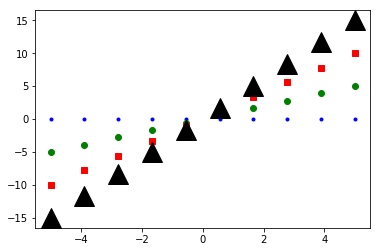

In [21]:
plt.plot(X,0*X, 'b.')                    #синие точки
plt.plot(X,1*X, 'go')                    #зеленые кружки
plt.plot(X,2*X, 's', color='#ff0000')    #красные квадаты (rgb цвет в hex)
plt.plot(X,3*X, 'k^', markersize=20 )    #большие черные треугольники
plt.show()

# Несколько графиков на картинке, matplotlib.axes

Как говорилось ранее, для более продвинутой работы с графиками иногда приходится использовать более сложные инструменты, одним из которых является класс `` matplotlib.axes`` <a href='https://matplotlib.org/3.3.2/api/axes_api.html#the-axes-class'>описание класса</a>. Непосредственная работа с данным классом позволяет настроить большее количество параметров каждого отдельного графика. 

Иногда бывает полезно построить несколько графиков на одном изображении. Для этого удобно использовать ``matplotlib.pyplot.subplot(*args)``, где ``*args`` формата ``(nrows, ncols, index)``, или ``int`` того же формата (ограничения: каждая цифра не больше 9). **Нумерация начинается с 1**. При вызове, данная функция возвращает объект из подкласа ``matplotlib.axes``.

Рассмотрим их совместное использование:

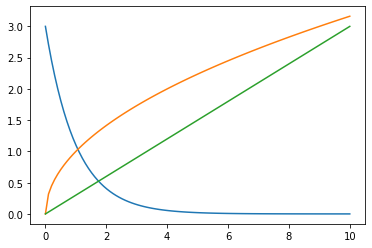

In [3]:
x = np.linspace(0, 10, 100)
y1 = 3*np.exp(-x)
y2 = x**0.5
y3 = x*3/10
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

Построим вместо этого три графика отдельно:

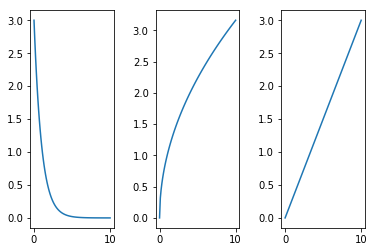

In [40]:
ax1=plt.subplot(1,3,1) # одна строка, три колонки, график №1
ax1.plot(x,y1)

ax2=plt.subplot(1,3,2) # одна строка, три колонки, график №2
ax2.plot(x,y2)

ax3=plt.subplot(1,3,3) # одна строка, три колонки, график №3
ax3.plot(x,y3)

plt.subplots_adjust(wspace=0.5)  #увеличиваем разделение между графиками
plt.show()

Другой подход - генерировать список графиков, а потом их по отдельности заполнять (удобно при общей легенде или других общих параметрах), используя функцию ``plt.subplots()``.

В данном примере дополнительно используется аргумент ``figsize`` 

``figsize`` : (float, float), optional,
width, height in inches. If not provided, defaults to ``rcParams["figure.figsize"] = [6.4, 4.8]``.

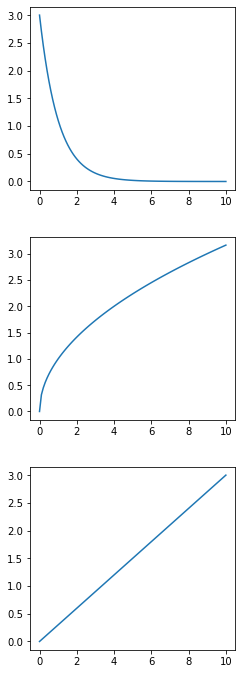

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(4, 10))
ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)
fig.tight_layout(pad=3.0) #добавляем отступы
plt.show()

Более сложный случай:

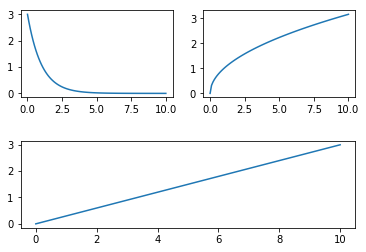

In [50]:
ax1=plt.subplot(2,2,1) # две строки, две колонки, график №1
ax1.plot(x,y1)

ax2=plt.subplot(2,2,2) # две строки, две колонки, график №2
ax2.plot(x,y2)

ax3=plt.subplot(2,1,2) # две строки, одна колонка, график №2!
ax3.plot(x,y3)

plt.subplots_adjust(hspace=0.5)  #увеличиваем горизонтальное разделение между графиками
plt.show()

# Масштаб и оси

## Пределы отображения  и масштабирование 

В случае, для изменения пределов, в которых отображается график используются функции ``plt.xlim(нижн, верхн)``, ``plt.ylim(нижн, верхн)``

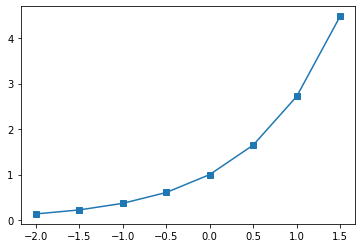

In [7]:
x = np.arange(-2, 2, 0.5)
y = np.exp(x)
plt.plot(x,y,'s-')
plt.show()

изменим пределы отображения

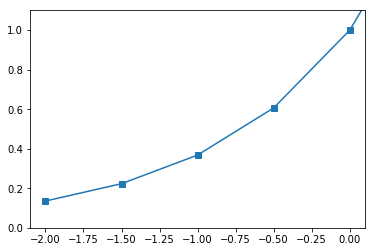

In [11]:
plt.plot(x,y,'s-')
plt.xlim(-2.1,0.1)
plt.ylim(0, 1.1)
plt.show()

Меняем пропорции с ``set_aspect(aspect_ratio)``, где ``aspect_ratio`` - отношение длин единичного отрезка по $Y$ к единичному отрезку по $X$

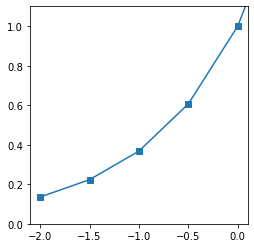

In [12]:
plt.plot(x,y,'s-')
ax=plt.gca()      # Get the current axes
ax.set_aspect(2.0)
plt.xlim(-2.1,0.1)
plt.ylim(0, 1.1)
plt.show()

## Оси и сетка

Для настройки осей используется класс ``matplotlib.spines``

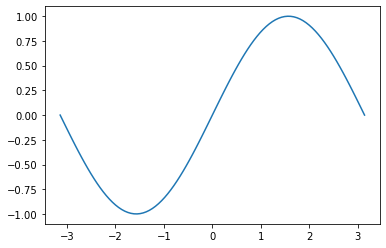

In [15]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

Переместим оси в центр

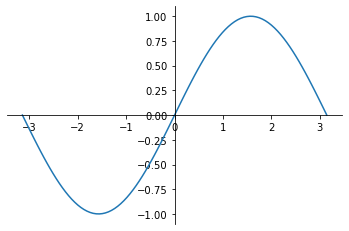

In [16]:
plt.plot(x,y)
ax = plt.gca()

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Или можно настроить координаты пересечения вручную

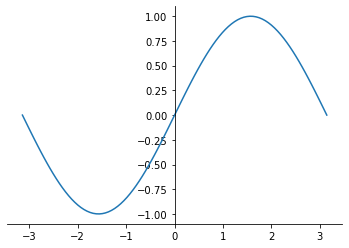

In [27]:
plt.plot(x,y)
ax = plt.gca()

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('axes', 0))  # 0 - у нижней части оси, 1 - у верхней 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

Для выставления шага делений осей и вида подписей данных можно использовать ``plt.yticks()`` и ``plt.xticks()``. 

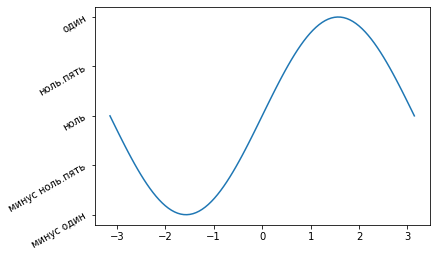

In [43]:
plt.plot(x,y)

plt.yticks([-1, -0.5, 0, 0.5, 1], 
           labels=['минус один', 'минус ноль.пять', 'ноль', 'ноль.пять','один'], 
           rotation='30')

plt.show()

Добавим сетку функцией ``plt.grid(b=None, which='major', axis='both', **kwargs)``

**b** : bool or None

**which** : ``{'major', 'minor', 'both'}``, optional
The grid lines to apply the changes on.

**axis** : ``{'both', 'x', 'y'}``, optional
The axis to apply the changes on.

****kwargs** : Line2D properties

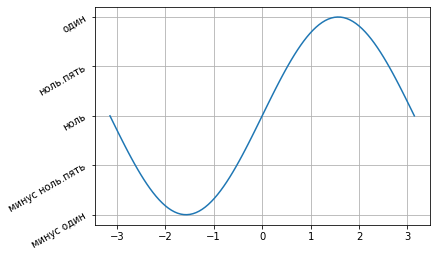

In [46]:
plt.plot(x,y)

plt.yticks([-1, -0.5, 0, 0.5, 1], 
           labels=['минус один', 'минус ноль.пять', 'ноль', 'ноль.пять','один'], 
           rotation='30')

plt.grid()

plt.show()

# Оформление

## matplotlib rcParams

В matplotlib  можно настроить положение отдельных элементов, отступы, шрифты и многое другое. Параметры всего этого задаются в <a href='https://matplotlib.org/3.1.0/tutorials/introductory/customizing.html#matplotlib-rcparams'>matplotlib rcParams</a>. Для многих эленетов существуют более удобные подходы, реализованные отдельными функциями.


Во всех текстовых полях в ``matplotlib`` можно использовать $\LaTeX$ для отображения специальных символов и формул.

## Легенда

Для отображения легенды проще всего использовать аргумент ``label`` и функцию ``plt.legend``. 

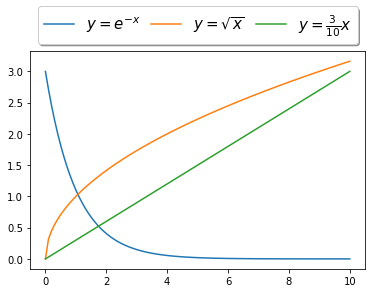

In [100]:
x = np.linspace(0, 10, 100)
y1 = 3*np.exp(-x)
y2 = x**0.5
y3 = x*3/10

plt.plot(x,y1, label='$y =3 e^{-x}$')
plt.plot(x,y2, label='$y=\sqrt{x}$')
plt.plot(x,y3, label=r'$y =\frac{3}{10} x$')

plt.legend(bbox_to_anchor=(0, 1, 1, 0.1), 
           mode="expand", ncol=3, 
           shadow='True',
           fontsize=15,)

plt.show()

## Заголовки и подписи

Для того чтобы оставить заголовок, используется функция ``plt.title(label, fontdict=None, loc='center', pad=None, **kwargs)``. Добавим к вышеописанному графику заголовок:

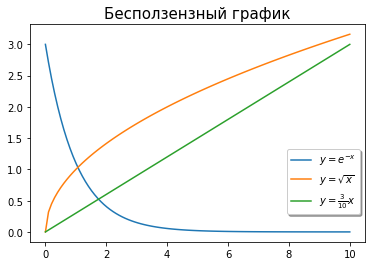

In [123]:
x = np.linspace(0, 10, 100)
y1 = 3*np.exp(-x)
y2 = x**0.5
y3 = x*3/10

plt.plot(x,y1, label='$y =3 e^{-x}$')
plt.plot(x,y2, label='$y=\sqrt{x}$')
plt.plot(x,y3, label=r'$y =\frac{3}{10} x$')

plt.legend(bbox_to_anchor=(0.7, 0.15, 0.3, 0.3),  
           shadow='True',)

plt.title('Бесползензный график', fontdict={'fontsize': 15})
plt.show()

Для добавления на график текста можно использовать ``plt.text(x, y, text)``. Также может быть полезно ``plt.annotate(text, xy, *args, **kwargs)``. Для добавления подписей к осям используется

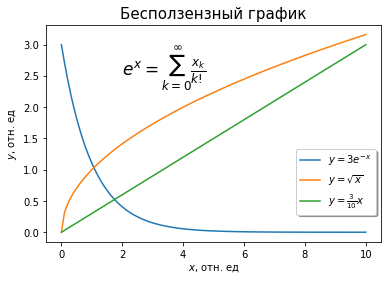

In [129]:
x = np.linspace(0, 10, 100)
y1 = 3*np.exp(-x)
y2 = x**0.5
y3 = x*3/10

plt.plot(x,y1, label='$y = 3e^{-x}$')
plt.plot(x,y2, label='$y=\sqrt{x}$')
plt.plot(x,y3, label=r'$y =\frac{3}{10} x$')

plt.legend(bbox_to_anchor=(0.7, 0.15, 0.3, 0.3), shadow='True',)

plt.title('Бесползензный график', fontdict={'fontsize': 15})

plt.text(2,2.5,r'$e^x = \sum_{k=0}^\infty \frac{x_k}{k!}$', fontdict={'fontsize': 17})

plt.xlabel('$x$, отн. ед')
plt.ylabel('$y$, отн. ед')

plt.show()

Если вам не нравятся шрифты или что-то еще в оформлении, вы можете изменить это в параметрах ``rcParams``